In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')
import re
import nltk



In [ ]:
# uploading the files:
from google.colab import files
import csv

uploaded = files.upload()

Saving product_class.csv to product_class.csv
Saving X_train_update.csv to X_train_update.csv
Saving Y_train_CVw08PX.csv to Y_train_CVw08PX.csv


In [ ]:
# reading in the file:

df_y = pd.read_csv('Y_train_CVw08PX.csv', usecols = ['prdtypecode'])
df_X= pd.read_csv('X_train_update.csv', usecols = ['designation', 'description', 'productid','imageid'])
df_class = pd.read_csv('product_class.csv', usecols = [ 'prdtypecode', 'prodtype'], sep = ';')

In [ ]:
df_y = pd.read_csv('Y_train_CVw08PX.csv')
df_X= pd.read_csv('X_train_update.csv')
df_class = pd.read_csv('product_class.csv', sep = ';')

In [ ]:
df_y.columns, df_X.columns, df_class.columns


(Index(['prdtypecode'], dtype='object'),
 Index(['designation', 'description', 'productid', 'imageid'], dtype='object'),
 Index(['prdtypecode', 'prodtype'], dtype='object'))

In [ ]:
len(df_class.prodtype.unique())

27

In [ ]:
df = pd.concat([df_X,df_y],1)

<ipython-input-4-165e90df2691>:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df = pd.concat([df_X,df_y],1)


In [ ]:
df.head(30)

,designation,description,productid,imageid,prdtypecode
0,Olivia: Personalisiertes Notizbuch / 150 Seite...,NaN,3804725264,1263597046,10
1,Journal Des Arts (Le) N° 133 Du 28/09/2001 - L...,NaN,436067568,1008141237,2280
2,Grand Stylet Ergonomique Bleu Gamepad Nintendo...,PILOT STYLE Touch Pen de marque Speedlink est ...,201115110,938777978,50
3,Peluche Donald - Europe - Disneyland 2000 (Mar...,NaN,50418756,457047496,1280
4,La Guerre Des Tuques,Luc a des id&eacute;es de grandeur. Il veut or...,278535884,1077757786,2705
5,Afrique Contemporaine N° 212 Hiver 2004 - Doss...,NaN,5862738,393356830,2280
6,Christof E: Bildungsprozessen Auf Der Spur,NaN,91920807,907794536,10
7,Conquérant Sept Cahier Couverture Polypro 240 ...,CONQUERANT CLASSIQUE Cahier 240 x 320 mm seyès...,344240059,999581347,2522
8,Puzzle Scooby-Doo Avec Poster 2x35 Pieces,NaN,4239126071,1325918866,1280
9,Tente Pliante V3s5-Pro Pvc Blanc - 3 X 4m50 - ...,Tente pliante V3S5 Pro PVC 500 gr/m² - 3 x 4m5...,3793572222,1245644185,2582


In [ ]:
print("Dimensions of the dataset:", df.shape)

Dimensions of the dataset: (84916, 5)


In [ ]:
missing_values = df.isnull().sum()
print(f"Missing values per column: { missing_values}")

Missing values per column: designation        0
description    29800
productid          0
imageid            0
prdtypecode        0
dtype: int64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84916 entries, 0 to 84915
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   designation  84916 non-null  object
 1   description  55116 non-null  object
 2   productid    84916 non-null  int64 
 3   prdtypecode  84916 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 2.6+ MB


In [ ]:
code_to_name =  {
  10	: 'livres_adulte',
	40	:  'jeux_videos_import',
	50	: 'accessoires_jeux_videos',
	60	:  'jeux_et_consoles_retro',
	1140:  'goodies_geek',
	1160:  'cartes_a_jouer',
	1180:	'figurines_wargames',
	1280:	'jouets_enfance',
	1281:	'jeux_societe',
	1300:	'modeles_reduits_ou_telecommandes',
	1301:	'materiel_enfance',
	1302:	'jouets_enfants',
	1320:	'petite_enfance',
	1560:	'mobilier_interieur_litterie',
	1920:	'accessoires_interieur',
	1940:	'nourriture',
	2060:	'decoration_interieur',
	2220:	'pour_animau',
	2280:	'magazines',
	2403:	'livres_jeunesse',
	2462:	'jeux_geek',
	2522:	'papeterie',
	2582:	'mobilier_jardin_cuisine',
	2583:	'piscine_spa',
	2585:	'jardin_bricolage',
	2705:	'livres_et_illustres',
	2905:	'jeux_videos_dematerialises',
}


# y_train_df['product_typr']=map(code_to_name) #  another solution
df['product_class'] = df['prdtypecode'].map(code_to_name)

In [ ]:
df.head()

,designation,description,productid,imageid,prdtypecode,product_class
0,Olivia: Personalisiertes Notizbuch / 150 Seite...,NaN,3804725264,1263597046,10,livres_adulte
1,Journal Des Arts (Le) N° 133 Du 28/09/2001 - L...,NaN,436067568,1008141237,2280,magazines
2,Grand Stylet Ergonomique Bleu Gamepad Nintendo...,PILOT STYLE Touch Pen de marque Speedlink est ...,201115110,938777978,50,accessoires_jeux_videos
3,Peluche Donald - Europe - Disneyland 2000 (Mar...,NaN,50418756,457047496,1280,jouets_enfance
4,La Guerre Des Tuques,Luc a des id&eacute;es de grandeur. Il veut or...,278535884,1077757786,2705,livres_et_illustres


In [ ]:
pd.set_option('display.max_colwidth', None)

In [ ]:
df.to_parquet('df.parquet')

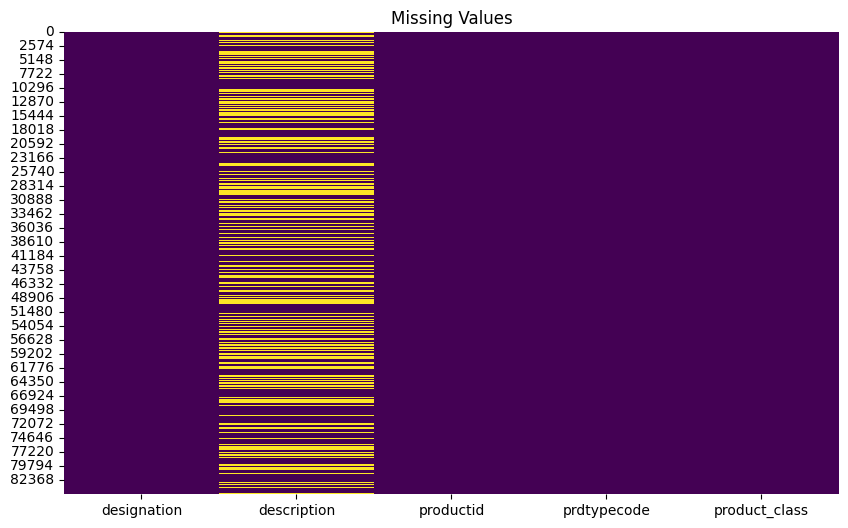

In [ ]:
# Create a heatmap of missing values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cmap="viridis", cbar=False)
plt.title("Missing Values")
plt.show()

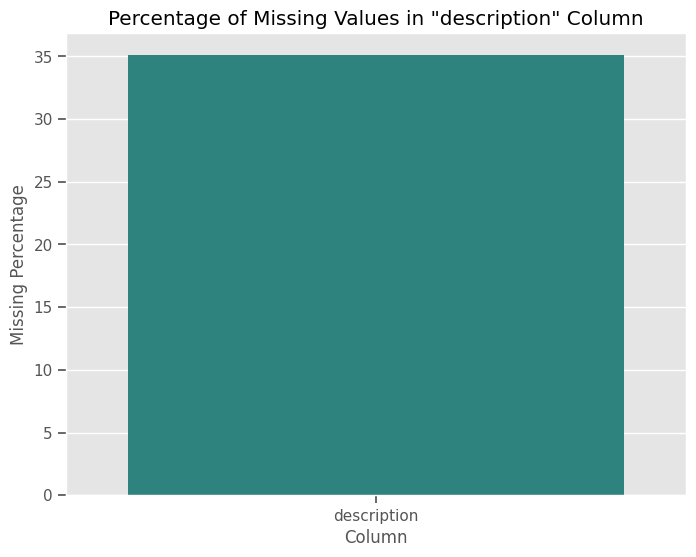

In [ ]:
# Calculate the percentage of missing values in the 'description' column
missing_percentage = (df['description'].isnull().sum() / len(df)) * 100

# Create a bar plot to visualize missing value percentage
plt.figure(figsize=(8, 6))
sns.barplot(x=['description'], y=[missing_percentage], palette="viridis")

# labels and title
plt.xlabel('Column')
plt.ylabel('Missing Percentage')
plt.title('Percentage of Missing Values in "description" Column')


plt.show()

In [ ]:
missing_values_per_category = df.groupby('product_class')['description'].apply(lambda x: x.isna().sum())
missing_values_per_category.sort_values(ascending=False)

product_class
livres_jeunesse                     4648
magazines                           4440
cartes_a_jouer                      3604
livres_adulte                       2778
goodies_geek                        1726
jeux_videos_import                  1642
jeux_geek                           1368
papeterie                           1189
modeles_reduits_ou_telecommandes    1173
petite_enfance                      1101
jouets_enfance                      1068
livres_et_illustres                 1025
piscine_spa                          903
figurines_wargames                   611
jeux_societe                         492
accessoires_jeux_videos              476
decoration_interieur                 286
jouets_enfants                       277
accessoires_interieur                207
jardin_bricolage                     198
mobilier_interieur_litterie          177
jeux_et_consoles_retro               133
materiel_enfance                     105
pour_animau                           66
mo

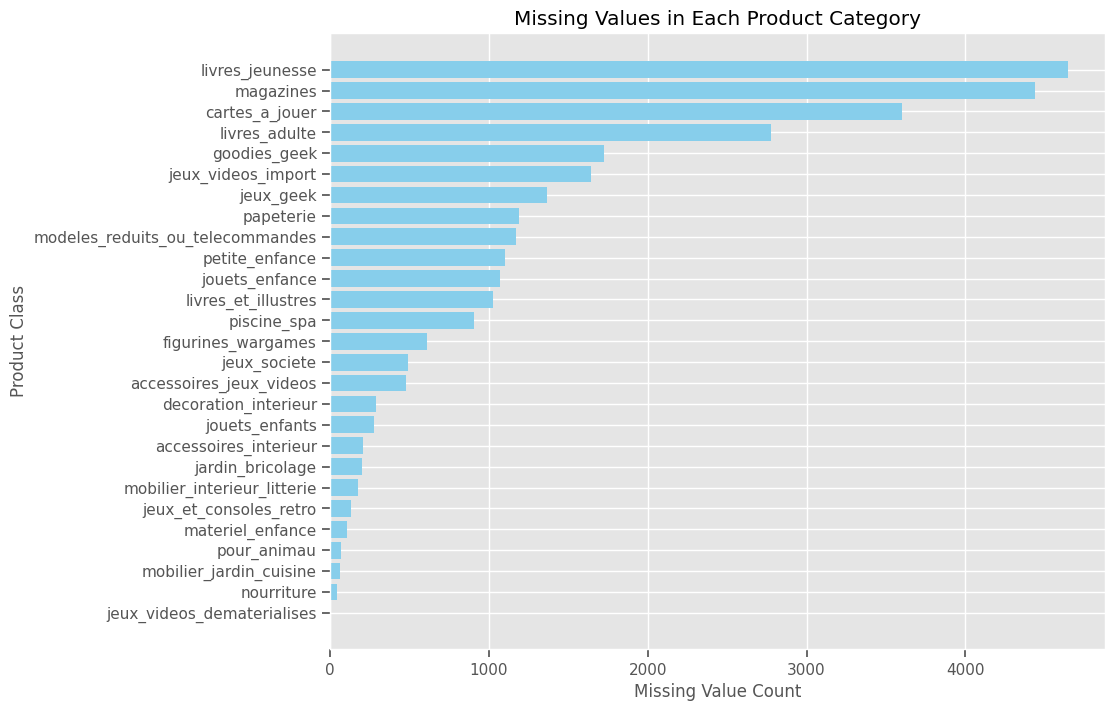

In [ ]:
# Calculate the count of missing values for each category
missing_values_per_category = df.groupby('product_class')['description'].apply(lambda x: x.isna().sum()).sort_values(ascending=True)

# Create a horizontal bar plot to visualize missing values per category
plt.figure(figsize=(10, 8))
plt.barh(y=missing_values_per_category.index, width=missing_values_per_category.values, color='skyblue')

# Set labels and title
plt.xlabel('Missing Value Count')
plt.ylabel('Product Class')
plt.title('Missing Values in Each Product Category')

# Show the plot
plt.show()


In [ ]:
missing_description_percentage = df.groupby('product_class')['description'].apply(lambda x: x.isna().mean() * 100)

In [ ]:
missing_description_percentage = missing_description_percentage.sort_values(ascending = False )

In [ ]:
pd.DataFrame(missing_description_percentage)

,description
product_class,
livres_jeunesse,97.360704
jeux_geek,96.270232
magazines,93.277311
cartes_a_jouer,91.171262
livres_adulte,89.152760
figurines_wargames,79.973822
jeux_videos_import,65.470494
goodies_geek,64.619993
livres_et_illustres,37.124230


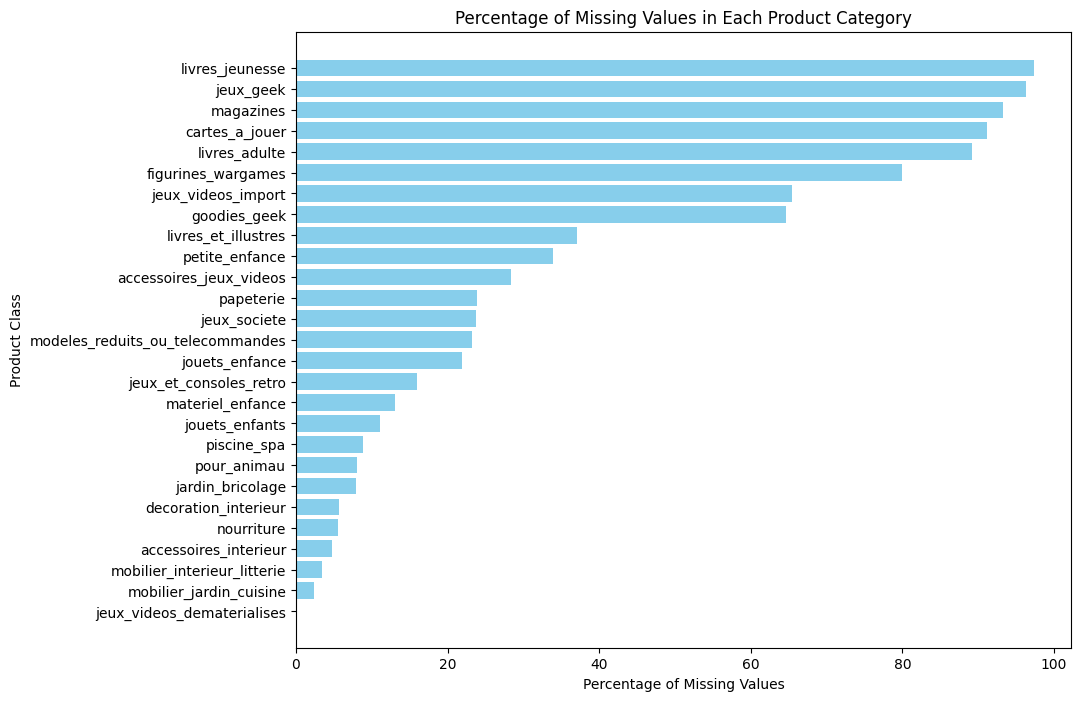

In [ ]:
# Calculate the percentage of missing values per category
missing_percentage_per_category = (df.groupby('product_class')['description'].apply(lambda x: x.isna().mean()) * 100).sort_values(ascending=True)

# Create a horizontal bar plot to visualize missing values per category
plt.figure(figsize=(10, 8))
plt.barh(y=missing_percentage_per_category.index, width=missing_percentage_per_category.values, color='skyblue')

# Set labels and title
plt.xlabel('Percentage of Missing Values')
plt.ylabel('Product Class')
plt.title('Percentage of Missing Values in Each Product Category')

# Show the plot
plt.show()


In [ ]:
product_class_counts = df['product_class'].value_counts(normalize=True)
product_class_counts.values

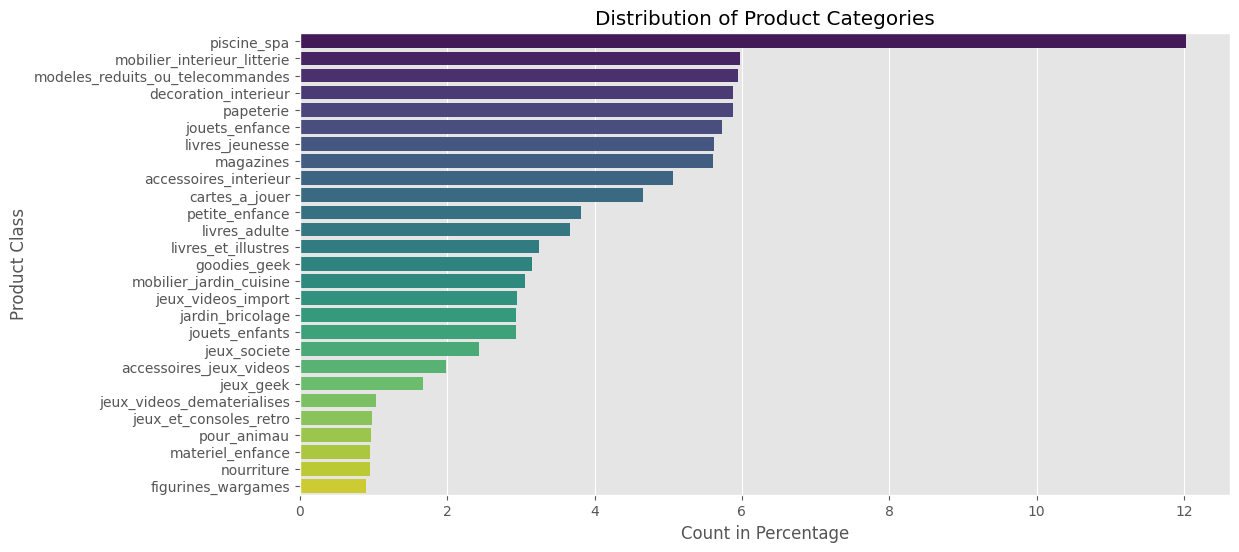

In [ ]:
# Count the occurrences of each product_class
product_class_counts = df['product_class'].value_counts(normalize=True) * 100

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=product_class_counts.values, y=product_class_counts.index, palette="viridis")

# Set labels and title
plt.xlabel('Count in Percentage')
plt.ylabel('Product Class')
plt.title('Distribution of Product Categories')

# Show the plot
plt.show()


In [ ]:
df['merged_text']  = df['designation'] + " "+ df['description'].fillna(" ")

In [ ]:
# droping the description and title column:
df.drop(['description', 'designation'],1, inplace = True)

<ipython-input-10-5aeaf2d3380d>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['description', 'designation'],1, inplace = True)


In [ ]:
df.head()

,productid,imageid,prdtypecode,product_class,merged_text
0,3804725264,1263597046,10,livres_adulte,Olivia: Personalisiertes Notizbuch / 150 Seite...
1,436067568,1008141237,2280,magazines,Journal Des Arts (Le) N° 133 Du 28/09/2001 - L...
2,201115110,938777978,50,accessoires_jeux_videos,Grand Stylet Ergonomique Bleu Gamepad Nintendo...
3,50418756,457047496,1280,jouets_enfance,Peluche Donald - Europe - Disneyland 2000 (Mar...
4,278535884,1077757786,2705,livres_et_illustres,La Guerre Des Tuques Luc a des id&eacute;es de...
